## Word embeddings with TF

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)
 
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNQ24IV/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNQ24IV/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNQ24IV/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
embedding_dim=16
 
encoder = info.features['text'].encoder
 
model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])
 
print("\n\nThe size of the vocabulary generated from IMDb Dataset is " + str(encoder.vocab_size) + '\n\n')
 



The size of the vocabulary generated from IMDb Dataset is 8185




In [ ]:
model.summary()
 
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)
 
word_embedding_vectors = model.layers[0].get_weights()[0]
 
print("\n\nThe shape of the trained weigths of the embedding layer is " + str(word_embedding_vectors.shape) + '\n\n')
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          130960    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5194 - accuracy: 0.6870 - val_loss: 0

# Word embedding visualization with t-SNE dimensionality reduction



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


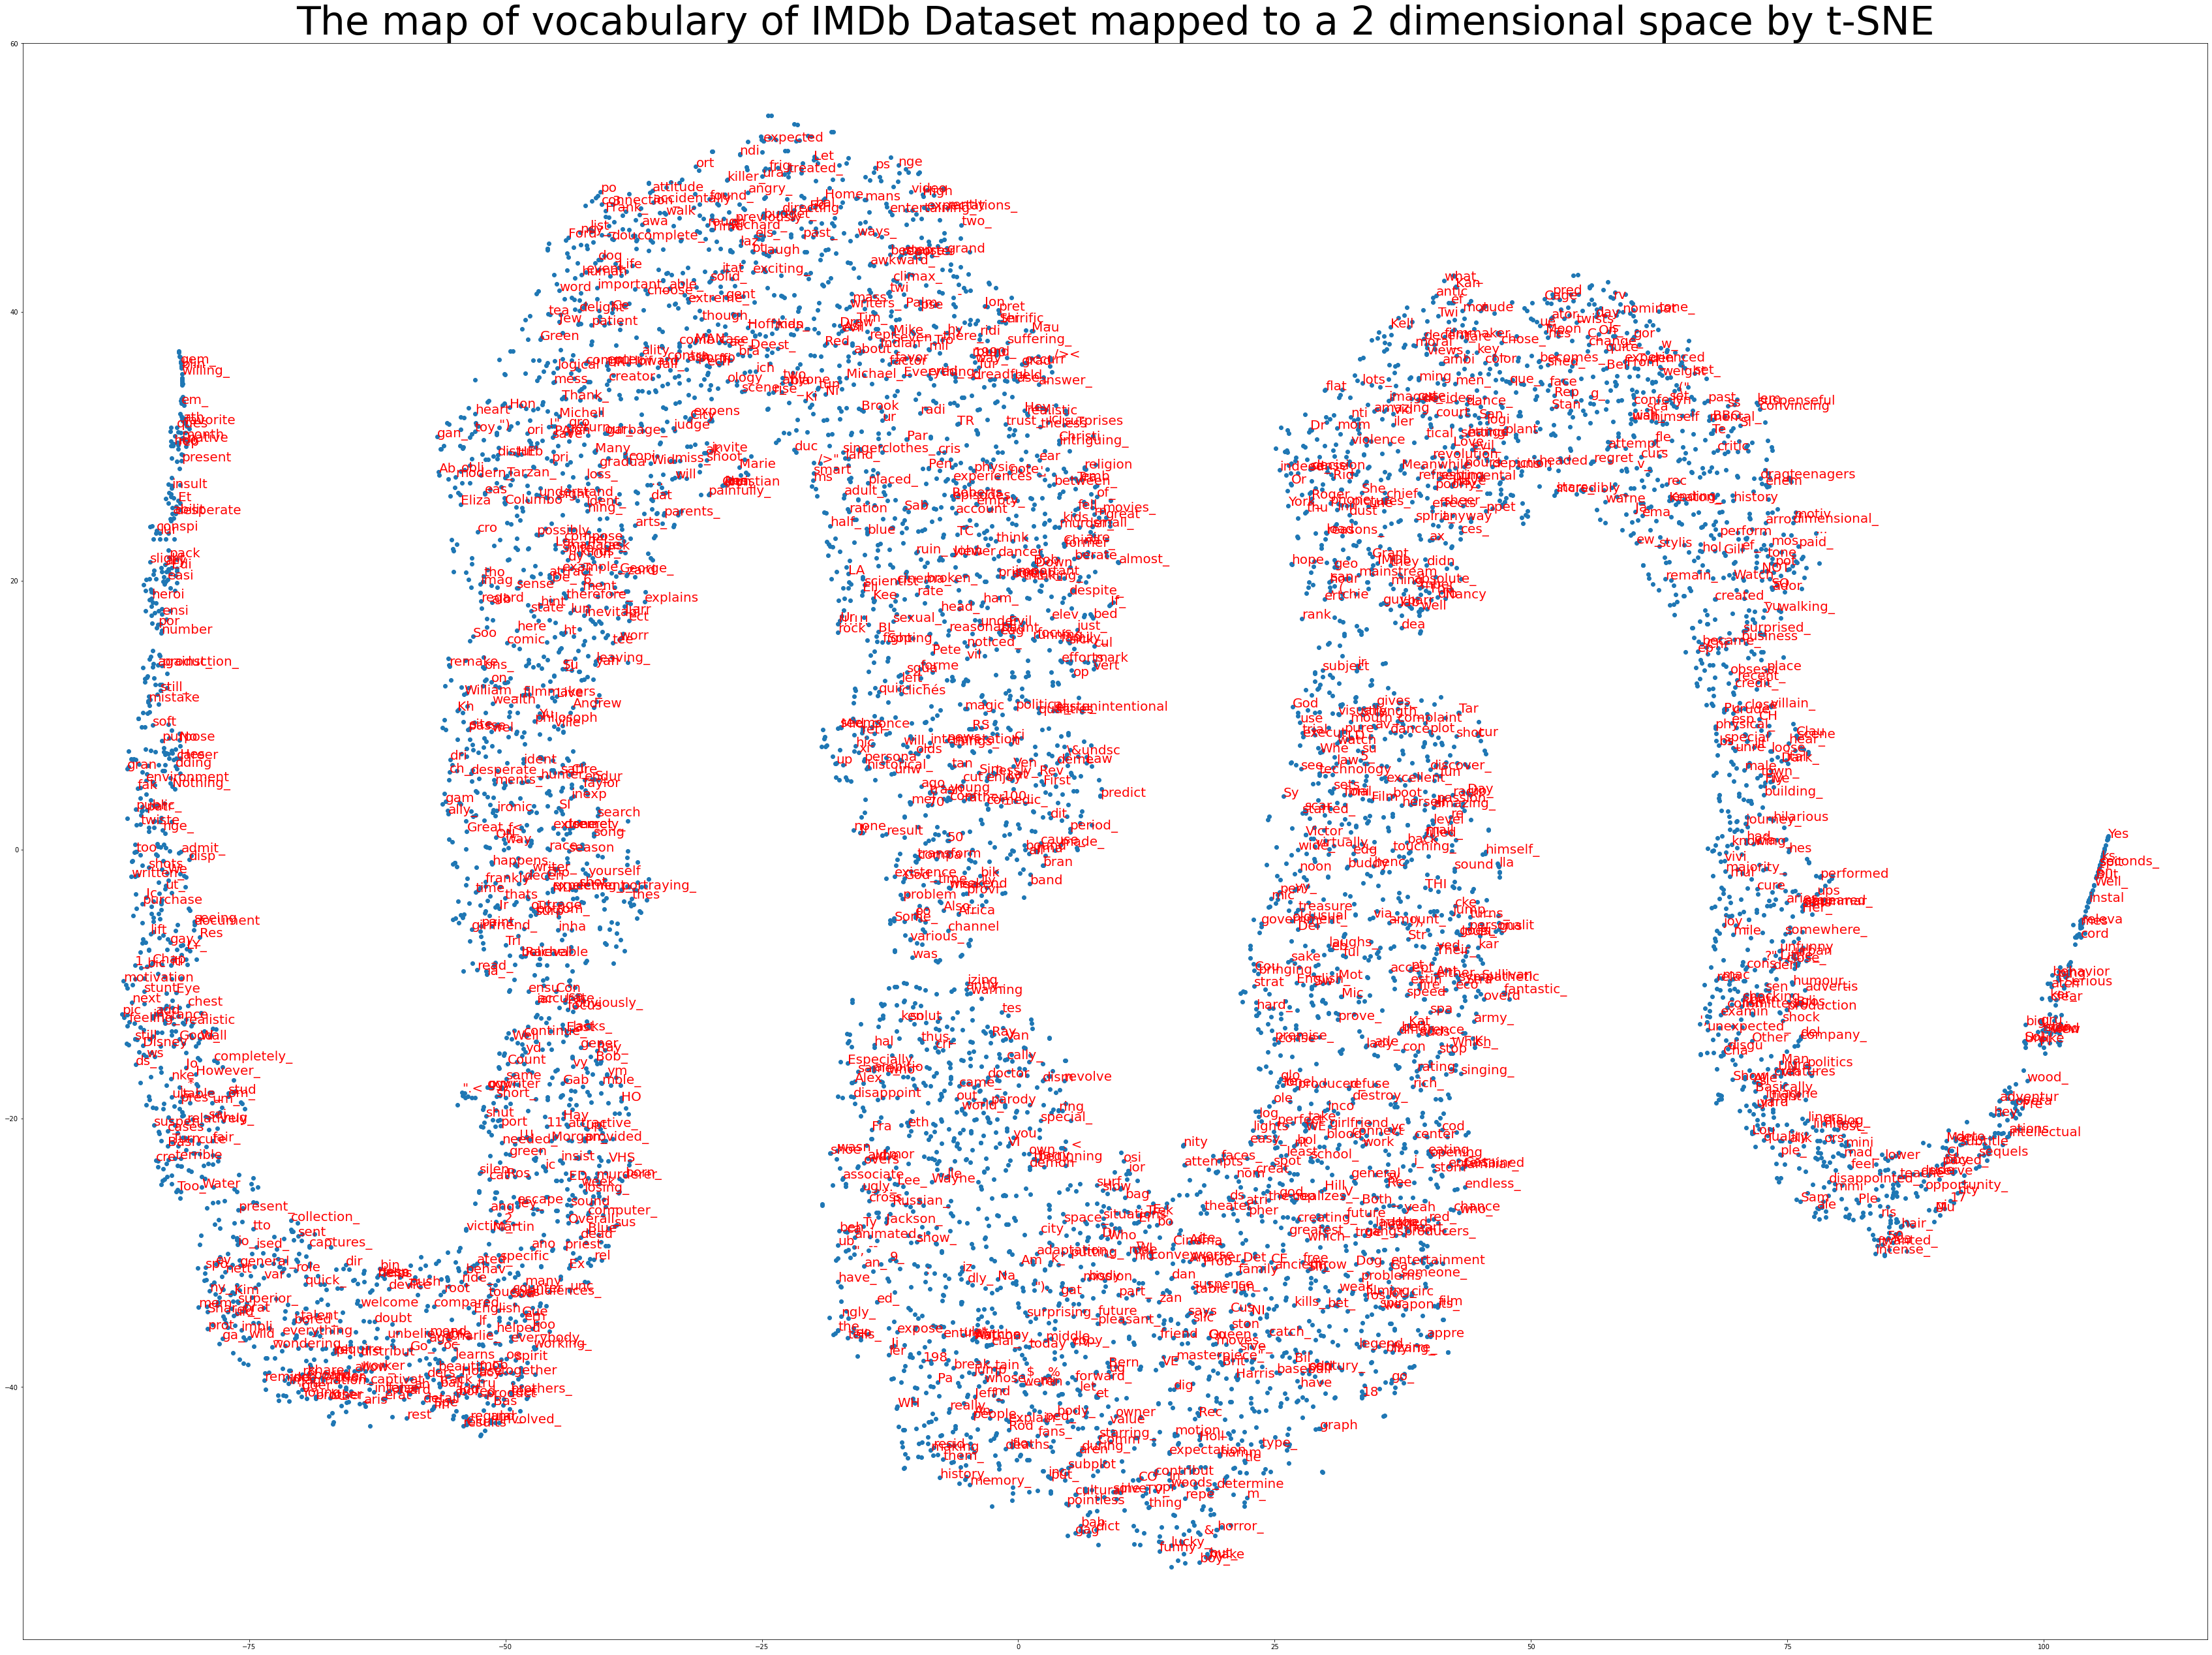

In [ ]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components = 2, init='pca', random_state=0).fit_transform(word_embedding_vectors)
 
import numpy as np
embedding_dict = zip(encoder.subwords, np.arange(len(encoder.subwords)))
embedding_dict = dict(embedding_dict)
 
import matplotlib.pyplot as plt
 
plt.figure(figsize=(60, 45))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
 
for i in range(0, len(encoder.subwords), 5):
    plt.text(X_reduced[i, 0], X_reduced[i, 1], encoder.subwords[i], fontsize=20, color='red')
plt.title("The map of vocabulary of IMDb Dataset mapped to a 2 dimensional space by t-SNE", fontsize=60)
#plt.savefig('imdb_tsne_map.png')
plt.show()